In [28]:
# importing relevant Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [29]:
# loading the dataset

url = "https://raw.githubusercontent.com/ThriveInternship/Thrive_Internship_ML_A/refs/heads/group-d/customer_support_tickets_dirty.csv" 
df = pd.read_csv(url)
print("Dataset loaded successfully")


Dataset loaded successfully


In [30]:
df.head()   # display first few rows


,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [31]:
df.tail()   # display last few rows

,text,label,ticket_id,agent_name
515,Currency converted incorrectly; expected USD. ...,Billng,1515,Charlie
516,Can't verify phone number; code not sent.,ACCOUNT,1516,Alice
517,Dark mode toggled but UI stays light.,Tech,1517,Charlie
518,Search results page is blank after entering a ...,Tech,1518,Dana
519,Payment failed during checkout with card endin...,Billng,1519,Alice


In [32]:
# basic dataset exploration

print("Column info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())    # count missing values
print("\nDuplicate rows:", df.duplicated().sum) # count duplicate rows

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB
None

Missing values per column:
text          25
label         25
ticket_id      0
agent_name     0
dtype: int64

Duplicate rows: <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Length: 520, dtype: bool>


In [33]:
df['text'] = df['text'].fillna('unknown')     # fill missing text entries
df = df.dropna(subset=['label'])              # drop rows without labels

print("Missing values handled successfully.")
print(df.info())

Missing values handled successfully.
<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   495 non-null    int64 
 3   agent_name  495 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.3+ KB
None


In [34]:
# remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"Removed {before - after } duplicate rows.")

Removed 0 duplicate rows.


In [35]:
df.describe(include='all')  # get summary statistics

,text,label,ticket_id,agent_name
count,495,495,495.000000,495
unique,174,16,NaN,4
top,unknown,Accnt,NaN,Alice
freq,23,42,NaN,135
mean,NaN,NaN,1259.818182,NaN
std,NaN,NaN,149.937852,NaN
min,NaN,NaN,1000.000000,NaN
25%,NaN,NaN,1131.500000,NaN
50%,NaN,NaN,1261.000000,NaN
75%,NaN,NaN,1388.000000,NaN


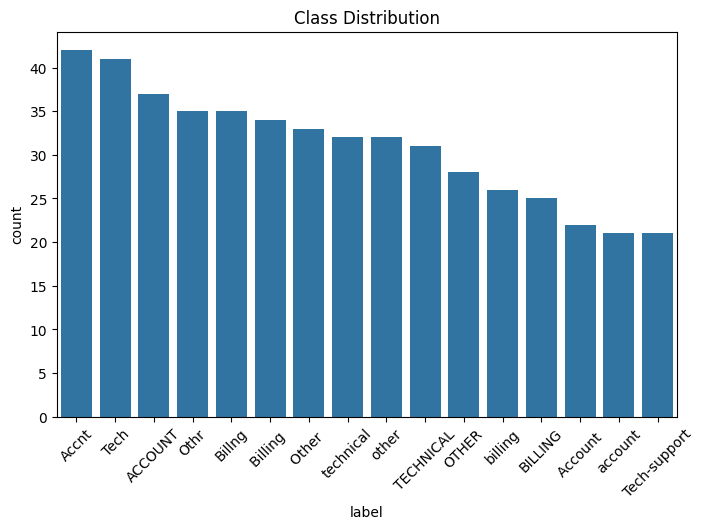

In [38]:
# visualize class distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [39]:
df['label'].value_counts()  # display class counts

label
Accnt           42
 Tech           41
ACCOUNT         37
Othr            35
Billng          35
Billing         34
Other           33
technical       32
other           32
TECHNICAL       31
OTHER           28
billing         26
BILLING         25
 Account        22
account         21
Tech-support    21
Name: count, dtype: int64

In [40]:
# standardizing categorical labels
df['label'] = df['label'].str.lower().str.strip()

df['label'] = df['label'].replace({
    'accnt': 'account',
    'account': 'account',
    ' account': 'account',
    'billing': 'billing',
    'billng': 'billing',
    'tech': 'technical',
    'tech-support': 'technical',
    'technical': 'technical',
    'other': 'other',
    'othr': 'other'
}) 

print("Labels standardized successfully.") 
print(df['label'].value_counts())  # display updated class counts



Labels standardized successfully.
label
other        128
technical    125
account      122
billing      120
Name: count, dtype: int64


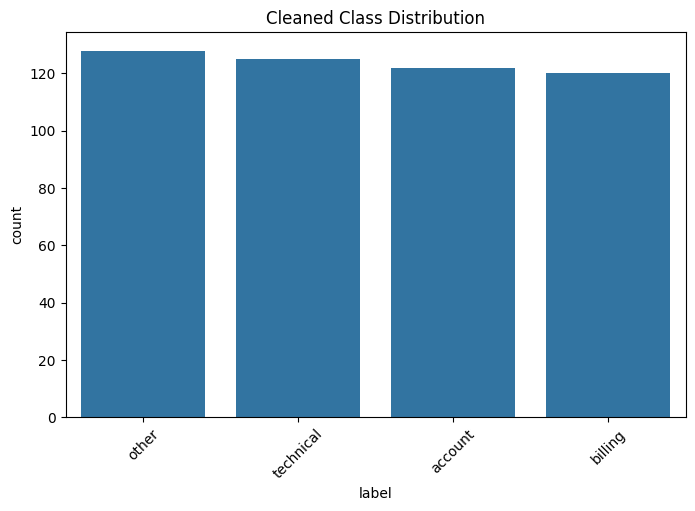

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Cleaned Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [44]:
#how do i save the cleaned data to the data folder as a csv file?
output_path = os.path.join('..', 'data', 'customer_support_tickets_cleaned.csv')
df.to_csv(output_path, index=False)